In [2]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

In [3]:
tfile = 'f78_M03_temperature.csv'
t = pd.read_csv(tfile, usecols = ['time', 'temperature'], parse_dates = 'Time', infer_datetime_format = True)
kfile = '78_03-01-2016_04-01-2016.csv'
kw = pd.read_csv(kfile, parse_dates = 'Time', infer_datetime_format = True)

In [4]:
kw.head(5)

,Time,Total Facility Power
0,02/29/2016 23:00:00,800.653982
1,03/01/2016 00:00:00,823.173863
2,03/01/2016 01:00:00,787.818586
3,03/01/2016 02:00:00,741.652377
4,03/01/2016 03:00:00,768.046417


In [5]:
kw = kw.drop([0])

In [6]:
t.tail(5)

,time,temperature
738,03/31/2016 19:00:00,73.18
739,03/31/2016 20:00:00,71.22
740,03/31/2016 21:00:00,68.66
741,03/31/2016 22:00:00,68.62
742,03/31/2016 23:00:00,68.40


In [7]:
rng = np.arange(start = 719, stop = 743, step = 1)
rng

array([719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731,
       732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742])

In [8]:
t = t.drop(rng)
t.tail(5)

,time,temperature
714,03/30/2016 19:00:00,62.00
715,03/30/2016 20:00:00,59.14
716,03/30/2016 21:00:00,57.99
717,03/30/2016 22:00:00,57.03
718,03/30/2016 23:00:00,55.32


In [9]:
t.head(5)

,time,temperature
0,03/01/2016 00:00:00,41.80
1,03/01/2016 01:00:00,40.83
2,03/01/2016 02:00:00,35.73
3,03/01/2016 03:00:00,37.26
4,03/01/2016 04:00:00,36.34


In [10]:
t.columns = ['Time', 'Temperature(F)']
t.head(3)

,Time,Temperature(F)
0,03/01/2016 00:00:00,41.80
1,03/01/2016 01:00:00,40.83
2,03/01/2016 02:00:00,35.73


In [11]:
kwt = pd.merge(t, kw, on = 'Time')

In [12]:
kwt.head(5)

,Time,Temperature(F),Total Facility Power
0,03/01/2016 00:00:00,41.80,823.173863
1,03/01/2016 01:00:00,40.83,787.818586
2,03/01/2016 02:00:00,35.73,741.652377
3,03/01/2016 03:00:00,37.26,768.046417
4,03/01/2016 04:00:00,36.34,808.480284


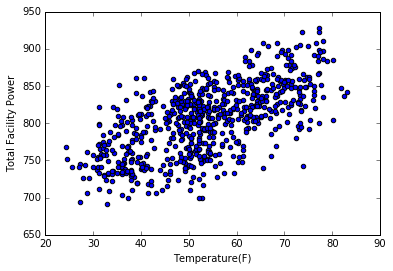

In [13]:
kwt.plot(x = 'Temperature(F)', y = 'Total Facility Power', kind = 'scatter')

In [56]:
pifile = 'N78_in_M03.csv'
pi = pd.read_csv(pifile, usecols = [ 'actual_date', 'total_weight'], parse_dates = 'actual_date', infer_datetime_format = True)
pi.columns = ['Time', 'Inbound(lbs)']

In [57]:
pi = pi.set_index(pd.DatetimeIndex(pi['Time']))

In [58]:
pi = pi.resample('H').sum()

In [59]:
pi = pi.fillna(0)
pi.head(10)

,Inbound(lbs)
2016-03-01 09:00:00,73026.0
2016-03-01 10:00:00,36189.0
2016-03-01 11:00:00,77078.0
2016-03-01 12:00:00,36053.0
2016-03-01 13:00:00,0.0
2016-03-01 14:00:00,2440.0
2016-03-01 15:00:00,0.0
2016-03-01 16:00:00,0.0
2016-03-01 17:00:00,0.0
2016-03-01 18:00:00,0.0


In [60]:
kwt['Time'] = pd.to_datetime(kwt['Time'])
idx = kwt.Time
idx.head(5)

0   2016-03-01 00:00:00
1   2016-03-01 01:00:00
2   2016-03-01 02:00:00
3   2016-03-01 03:00:00
4   2016-03-01 04:00:00
Name: Time, dtype: datetime64[ns]

In [61]:
pi = pi.reindex(idx, fill_value=0)
pi.head(15)

,Inbound(lbs)
Time,
2016-03-01 00:00:00,0.0
2016-03-01 01:00:00,0.0
2016-03-01 02:00:00,0.0
2016-03-01 03:00:00,0.0
2016-03-01 04:00:00,0.0
2016-03-01 05:00:00,0.0
2016-03-01 06:00:00,0.0
2016-03-01 07:00:00,0.0
2016-03-01 08:00:00,0.0


In [62]:
pi.head(5)

,Inbound(lbs)
Time,
2016-03-01 00:00:00,0.0
2016-03-01 01:00:00,0.0
2016-03-01 02:00:00,0.0
2016-03-01 03:00:00,0.0
2016-03-01 04:00:00,0.0


In [63]:
pi.reset_index(level=0, inplace=True)

In [64]:
pi.head(5)

,Time,Inbound(lbs)
0,2016-03-01 00:00:00,0.0
1,2016-03-01 01:00:00,0.0
2,2016-03-01 02:00:00,0.0
3,2016-03-01 03:00:00,0.0
4,2016-03-01 04:00:00,0.0


In [65]:
kwtp = pd.merge(kwt, pi, on = 'Time')
kwtp.head(10)

,Time,Temperature(F),Total Facility Power,Inbound(lbs)
0,2016-03-01 00:00:00,41.80,823.173863,0.0
1,2016-03-01 01:00:00,40.83,787.818586,0.0
2,2016-03-01 02:00:00,35.73,741.652377,0.0
3,2016-03-01 03:00:00,37.26,768.046417,0.0
4,2016-03-01 04:00:00,36.34,808.480284,0.0
5,2016-03-01 05:00:00,35.23,784.306267,0.0
6,2016-03-01 06:00:00,34.21,821.327244,0.0
7,2016-03-01 07:00:00,33.43,788.318806,0.0
8,2016-03-01 08:00:00,39.73,754.899474,0.0
9,2016-03-01 09:00:00,54.06,820.241929,73026.0


In [66]:
kwtp.to_csv('f78_AllData.csv')

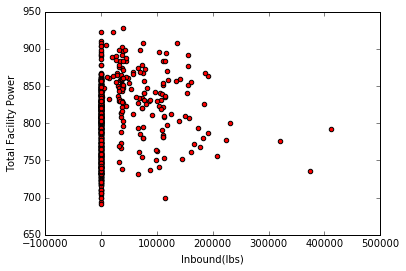

In [67]:
kwtp.plot(x = 'Inbound(lbs)', y = 'Total Facility Power', kind = 'scatter' , color = 'red')

In [68]:
pofile = 'N78_od_M03.csv'
po = pd.read_csv(pofile, usecols = [ 'actual_date', 'total_weight'], parse_dates = 'actual_date', infer_datetime_format = True)
po.columns = ['Time', 'Onbound (lbs)']

In [69]:
po = po.set_index(pd.DatetimeIndex(po['Time']))
po = po.resample('H').sum()
po = po.fillna(0)
po.head(5)

,Onbound (lbs)
2016-03-01 06:00:00,19250.0
2016-03-01 07:00:00,75134.0
2016-03-01 08:00:00,0.0
2016-03-01 09:00:00,37871.0
2016-03-01 10:00:00,33796.0


In [70]:
po = po.reindex(idx, fill_value=0)
po.head(10)

,Onbound (lbs)
Time,
2016-03-01 00:00:00,0.0
2016-03-01 01:00:00,0.0
2016-03-01 02:00:00,0.0
2016-03-01 03:00:00,0.0
2016-03-01 04:00:00,0.0
2016-03-01 05:00:00,0.0
2016-03-01 06:00:00,19250.0
2016-03-01 07:00:00,75134.0
2016-03-01 08:00:00,0.0


In [71]:
po.reset_index(level=0, inplace=True)
po.head(10)

,Time,Onbound (lbs)
0,2016-03-01 00:00:00,0.0
1,2016-03-01 01:00:00,0.0
2,2016-03-01 02:00:00,0.0
3,2016-03-01 03:00:00,0.0
4,2016-03-01 04:00:00,0.0
5,2016-03-01 05:00:00,0.0
6,2016-03-01 06:00:00,19250.0
7,2016-03-01 07:00:00,75134.0
8,2016-03-01 08:00:00,0.0
9,2016-03-01 09:00:00,37871.0


In [72]:
kwtpo = pd.merge(kwtp, po, on = 'Time')

In [74]:
kwtpo.head(10)

,Time,Temperature(F),Total Facility Power,Inbound(lbs),Onbound (lbs)
0,2016-03-01 00:00:00,41.80,823.173863,0.0,0.0
1,2016-03-01 01:00:00,40.83,787.818586,0.0,0.0
2,2016-03-01 02:00:00,35.73,741.652377,0.0,0.0
3,2016-03-01 03:00:00,37.26,768.046417,0.0,0.0
4,2016-03-01 04:00:00,36.34,808.480284,0.0,0.0
5,2016-03-01 05:00:00,35.23,784.306267,0.0,0.0
6,2016-03-01 06:00:00,34.21,821.327244,0.0,19250.0
7,2016-03-01 07:00:00,33.43,788.318806,0.0,75134.0
8,2016-03-01 08:00:00,39.73,754.899474,0.0,0.0
9,2016-03-01 09:00:00,54.06,820.241929,73026.0,37871.0


In [75]:
kwtpo.to_csv('f78_AllData.csv')